In [8]:
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# We will pass in a `Quantity` object with the units specified. 

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

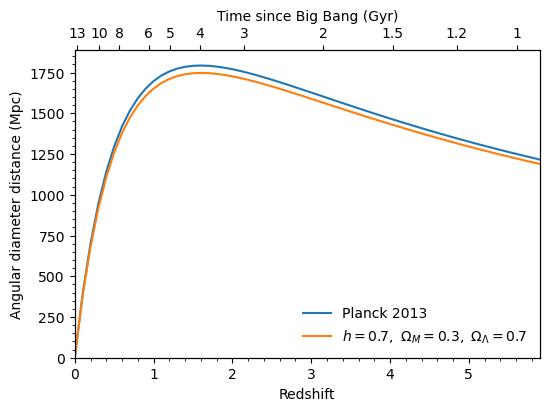

In [24]:
import numpy as np
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr
from astropy.cosmology import Planck13, z_at_value
ageticks = [z_at_value(cosmo.age, age, method='Bounded') for age in ages]


#fig = plt.figure(figsize=(6,4))
#ax = fig.add_subplot(111)
#ax.plot(zvals, dist)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()